<a href="https://colab.research.google.com/github/Tanzaniav0825/Algorithms-of-Data-Science/blob/session-1/Session_1_AODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column      

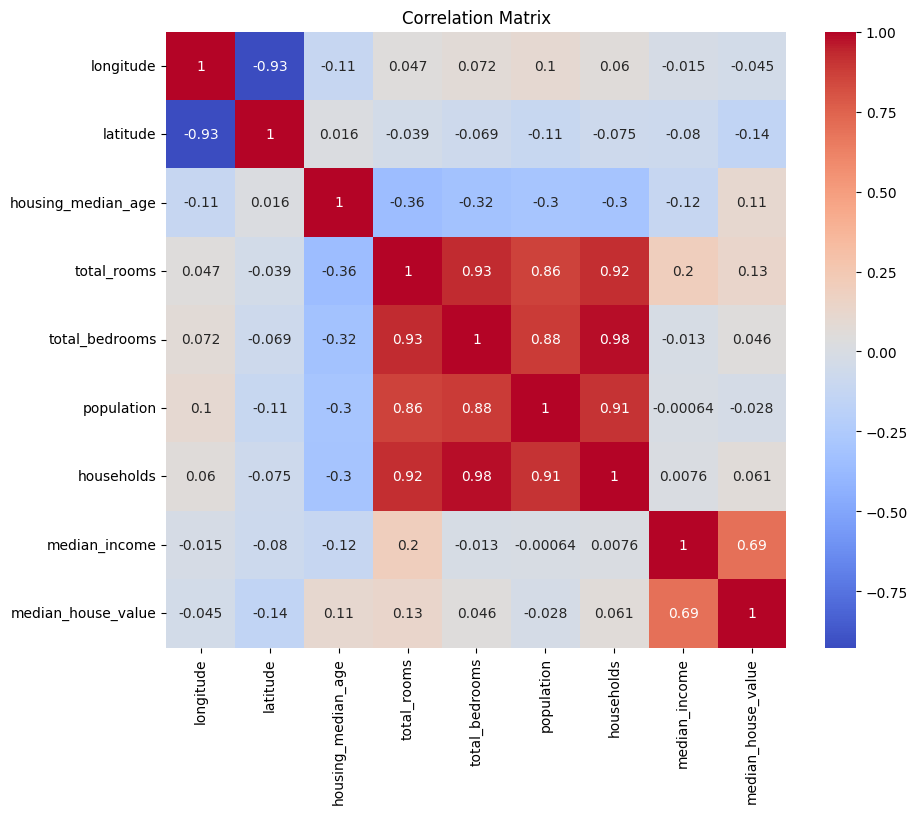

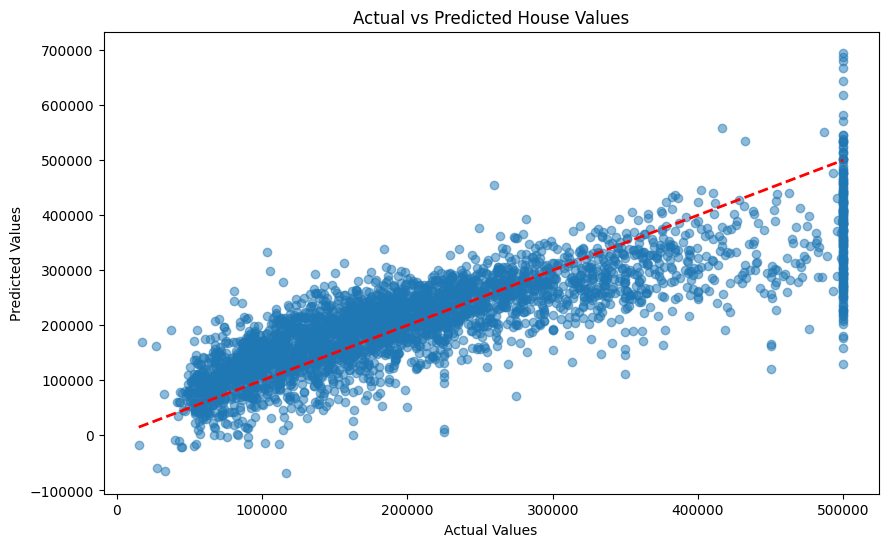

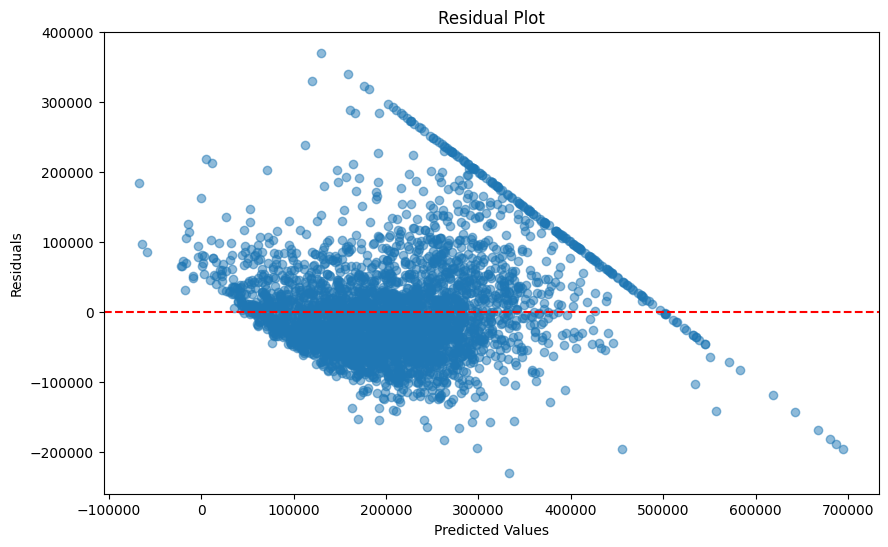

<Figure size 1000x600 with 0 Axes>

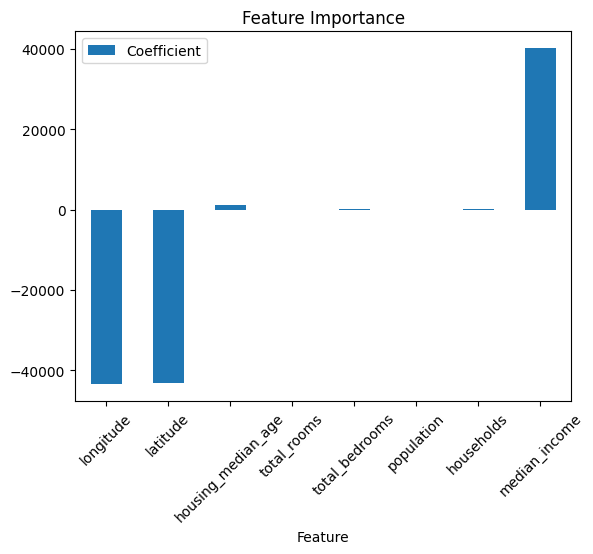

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# 1. Separate features (X) and target variable (y)
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('\nModel Performance:')
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared Score:', r2)

# 6. Print feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print('\nFeature Coefficients:')
print(coefficients)

# 7. Visualizations
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Feature importance plot
plt.figure(figsize=(10,6))
coefficients.plot(x='Feature', y='Coefficient', kind='bar')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [2]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [3]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900  

In [4]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [0.52201778 0.56428342 0.60260364 0.39679821 0.65576199]
Average CV score: 0.5482930097693346


In [5]:
# Make predictions for new data
new_data = X_test.iloc[0:1]  # Example with one row
prediction = model.predict(new_data)
print("Predicted house value:", prediction)

Predicted house value: [143770.39502964]


In [6]:
# Sort features by absolute coefficient value to see most influential features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Absolute_Coefficient': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)
print("\nFeatures ranked by importance:")
print(feature_importance)


Features ranked by importance:
              Feature  Absolute_Coefficient
0           longitude          43465.247687
1            latitude          43106.304441
7       median_income          40194.726347
2  housing_median_age           1131.724382
4      total_bedrooms            113.707973
6          households             45.147555
5          population             35.657077
3         total_rooms              8.843261


In [7]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"\nA one unit increase in {feature} is associated with a ${coef:,.2f} change in house value")


A one unit increase in longitude is associated with a $-43,465.25 change in house value

A one unit increase in latitude is associated with a $-43,106.30 change in house value

A one unit increase in housing_median_age is associated with a $1,131.72 change in house value

A one unit increase in total_rooms is associated with a $-8.84 change in house value

A one unit increase in total_bedrooms is associated with a $113.71 change in house value

A one unit increase in population is associated with a $-35.66 change in house value

A one unit increase in households is associated with a $45.15 change in house value

A one unit increase in median_income is associated with a $40,194.73 change in house value


/tmp/ipython-input-2239356657.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_analysis = df.groupby('income_bracket')['median_house_value'].agg(['mean', 'min', 'max', 'count'])


Housing Market Analysis by Income Bracket:
                         mean      min       max  count
income_bracket                                         
Very Low        117934.710000  14999.0  500001.0   3400
Low             156875.888824  17500.0  500001.0   3400
Medium          194951.204352  40400.0  500001.0   3401
High            229920.447485  14999.0  500001.0   3399
Very High       336832.596176  47500.0  500001.0   3400


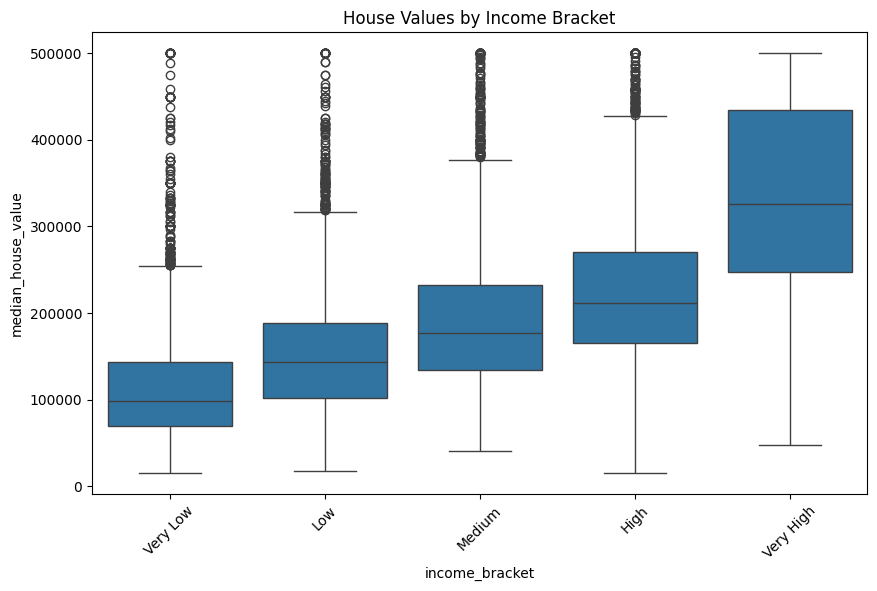

In [8]:
# Group data by income brackets and analyze house values
df['income_bracket'] = pd.qcut(df['median_income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
income_analysis = df.groupby('income_bracket')['median_house_value'].agg(['mean', 'min', 'max', 'count'])
print("Housing Market Analysis by Income Bracket:")
print(income_analysis)

# Visualize the relationship
plt.figure(figsize=(10,6))
sns.boxplot(x='income_bracket', y='median_house_value', data=df)
plt.xticks(rotation=45)
plt.title('House Values by Income Bracket')
plt.show()

In [9]:
# Identify high-income areas for luxury development
high_income_areas = df[df['median_income'] > df['median_income'].quantile(0.75)]
print("\nHigh Income Area Statistics:")
print(high_income_areas.describe())


High Income Area Statistics:
         longitude     latitude  housing_median_age   total_rooms  \
count  4250.000000  4250.000000         4250.000000   4250.000000   
mean   -119.596544    35.376652           25.881647   3265.721647   
std       1.993185     1.930084           12.718039   2776.815671   
min    -124.170000    32.570000            1.000000      8.000000   
25%    -121.950000    33.850000           16.000000   1759.500000   
50%    -118.490000    34.200000           25.000000   2539.000000   
75%    -117.950000    37.450000           35.000000   3786.500000   
max    -115.390000    40.940000           52.000000  37937.000000   

       total_bedrooms    population   households  median_income  \
count     4250.000000   4250.000000  4250.000000    4250.000000   
mean       524.364941   1438.688941   500.619294       6.431169   
std        445.980150   1255.499691   413.454425       1.799979   
min          1.000000     11.000000     1.000000       4.767900   
25%        28